In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as sio
from tensorflow import keras
from numpy import savetxt

In [3]:
# Load data from emnist
data = sio.loadmat("emnist-byclass.mat")['dataset']

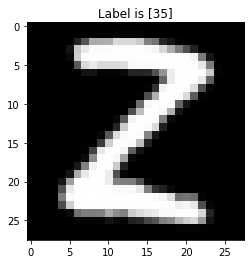

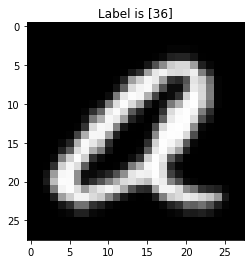

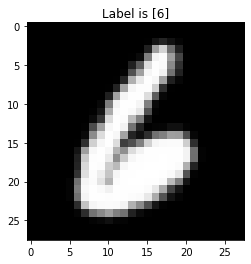

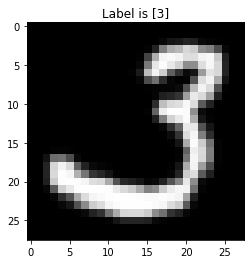

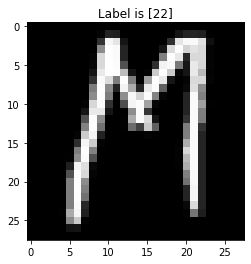

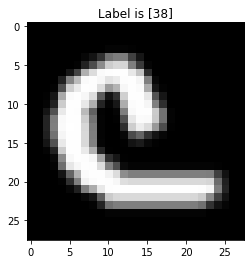

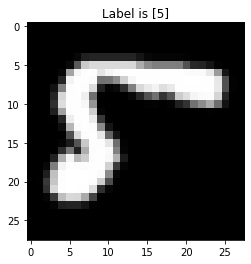

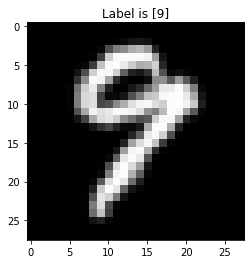

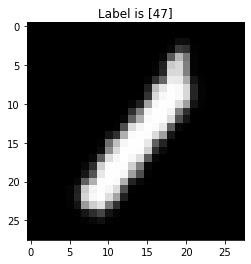

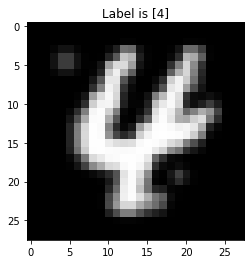

In [4]:
# data[0][0][0] - 3 options (train, test, mapping)
# data[0][0][0][0][0][0] - 3 options (images, labels, writers)
data[0][0][0][0][0][0][0]

for i in range(10):
    label = data[0][0][0][0][0][1][0 + i]

    pixels = data[0][0][0][0][0][0][0 + i].reshape((28, 28)).transpose()

    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [32]:
from sklearn.model_selection import train_test_split

trainSize = 0.1

X_train_data = data[0][0][0][0][0][0]
y_train_data = data[0][0][0][0][0][1]

X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, train_size=trainSize, test_size=trainSize, random_state=0)

In [33]:
X_test = data[0][0][1][0][0][0]
y_test = data[0][0][1][0][0][1]

In [34]:
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [35]:
labels_train = tf.reshape(tf.one_hot(y_train, 62), [-1, 62])
labels_val = tf.reshape(tf.one_hot(y_val, 62), [-1, 62])
labels_test = tf.reshape(tf.one_hot(y_test, 62), [-1, 62])

In [36]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, input_dim=784, activation = 'relu'),
    tf.keras.layers.Dense(750, activation = 'relu'),
    tf.keras.layers.Dense(350, activation = 'relu'),
    tf.keras.layers.Dense(62, activation='softmax')])

In [37]:
# compile the keras model
net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
net.fit(X_train, labels_train, epochs=1, batch_size=100)

698/698 [==============================] - 10s 13ms/step - loss: 0.1303 - accuracy: 0.5889


In [39]:
# Evaluate the trained model using keras built-in function
score = net.evaluate(X_test, labels_test, verbose=0)
print("Test loss:", format(score[0],".4f"))
print("Test accuracy:", score[1])

Test loss: 0.0294
Test accuracy: 0.7063091397285461


In [40]:
y_softmax = net.predict(X_test)
y_pred = np.argmax(y_softmax, axis = -1)

3636/3636 [==============================] - 13s 4ms/step


In [42]:
savetxt('ypred_DNN.csv', y_pred, delimiter=',')
print(y_pred.shape)

(116323,)


In [26]:
from sklearn.metrics import confusion_matrix

# Evaluate predicted testing output
# Since softmax output is used, these outputs are probability 
# vectors of value between 0 and 1 and values of each output 
# vector added to 1
y_softmax = net.predict(X_test)
y_pc = np.argmax(y_softmax, axis = -1)
cm = confusion_matrix(y_test, y_pc)

correct = 0
for i in range(len(cm)):
    correct += cm[i][i]

r = round((correct) / np.sum(cm), 4)
print(f'Classifiation Rate: {r}')

3636/3636 [==============================] - 15s 4ms/step
Classifiation Rate: 0.7302


In [27]:
savetxt('data_DNN.csv', cm, delimiter=',')